In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import itertools

# Read in Pickle

In [8]:
cleaned_df = pd.read_pickle('./data/cleaned_df.pkl')
cleaned_train = pd.read_pickle('./data/trained_pickle.pkl')
cleaned_test = pd.read_pickle('./data/tested_pickle.pkl')

In [9]:
# Cross validate before running ensemble methods

In [12]:
cleaned_train.head()
X_train = cleaned_train.loc[:, cleaned_train.columns != 'target']
y_train = cleaned_train.target

In [14]:
X_test = cleaned_test.loc[:, cleaned_train.columns != 'target']
y_test = cleaned_test.target

## KNN

#### Find optimal value for K

In [22]:
k_range = list(range(1, 13))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7129191648438472, 0.7368616022070968, 0.7323091467506601, 0.7360445035164727, 0.7382101960580768, 0.7397547821860965, 0.7442353669827826, 0.7393499467477884, 0.7417211474277036, 0.7350376151855075, 0.7356934890220912, 0.7343773114954381]


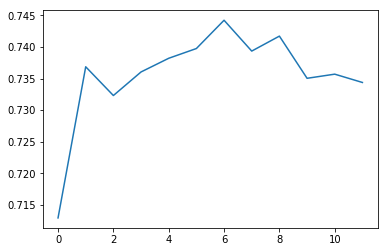

In [23]:
plt.plot(k_scores)

#### The optimal value of k is 7. K=6 has a higher F1 score, but it is best to choose an odd value for k

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)

#### How to plot Confusion Matrix
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[4298  229]
 [1090  382]]


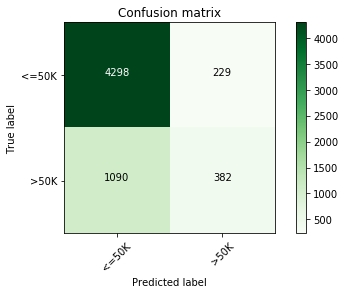

In [43]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['<=50K', '>50K']
plot_confusion_matrix(cm, classes=classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Greens)

In [44]:
382/1090

0.3504587155963303

The number of Positives that were correctly identified are 35% of the actual Positives that exist in the dataset. Therefore, KNN is not the best classification algorithm to use in this case.